In [3]:
from magicgap import *

In [91]:
data = load_data("extremal_qudit_magic")
d_b_range = []
mins = {}
maxs = {}
for run in data:
    d_b = run["d_b"]
    d_b_range.append(d_b)
    if d_b not in mins:
        mins[d_b] = []
        maxs[d_b] = []
    mins[d_b].append((run["d_s"], run["avg_se_min"]))
    maxs[d_b].append((run["d_s"], run["avg_se_max"]))

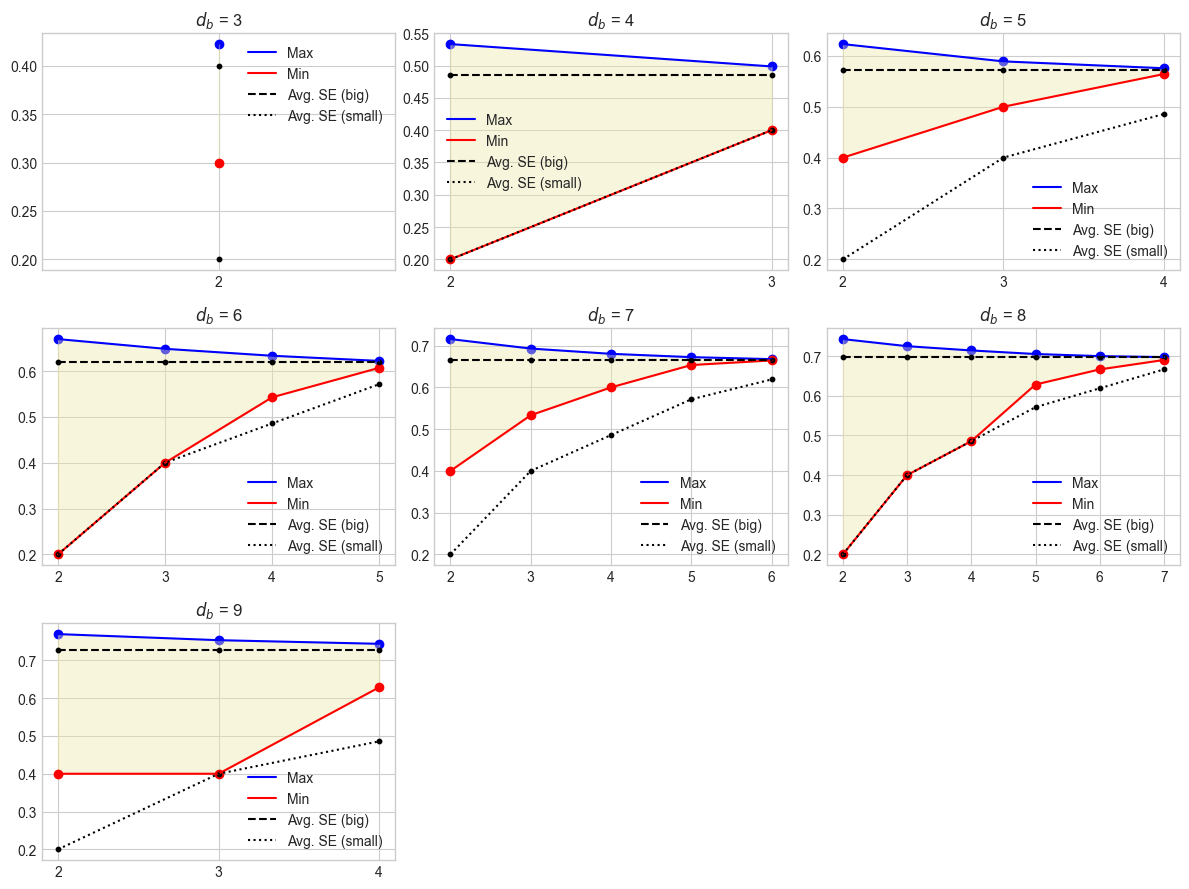

In [92]:
plt.style.use('seaborn-v0_8-whitegrid')

n = len(mins)
cols = math.ceil(math.sqrt(n))
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
axes = axes.flatten()
for i, d_b in enumerate(mins.keys()):
    d_s_range, d_s_mins = zip(*mins[d_b])
    d_s_range, d_s_maxs = zip(*maxs[d_b])
    se_s = [avg_magic_analytic(d_s) for d_s in d_s_range]

    axes[i].plot(d_s_range, d_s_maxs, color="blue", label="Max")
    axes[i].scatter(d_s_range, d_s_maxs, color="blue")

    axes[i].fill_between(d_s_range, d_s_mins, d_s_maxs, alpha=0.4, color="palegoldenrod")

    axes[i].plot(d_s_range, d_s_mins, color="red", label="Min")
    axes[i].scatter(d_s_range, d_s_mins, color="red")

    axes[i].plot(d_s_range, [avg_magic_analytic(d_b)]*len(d_s_range), label="Avg. SE (big)", linestyle="--", color="black")
    axes[i].scatter(d_s_range, [avg_magic_analytic(d_b)]*len(d_s_range), color="black", s=10)

    axes[i].plot(d_s_range, se_s, label="Avg. SE (small)", linestyle=":", color="black")
    axes[i].scatter(d_s_range, se_s, color="black", s=10)

    axes[i].set_title("$d_b$ = %d" % d_b)
    axes[i].set_xticks(d_s_range)
    axes[i].grid(True)
    axes[i].legend()

for j in range(n, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


In [95]:
data = load_data("extremal_nqubit_magic")
d_b_range = []
mins = {}
maxs = {}
for run in data:
    d_b = run["d_b"]
    d_b_range.append(d_b)
    if d_b not in mins:
        mins[d_b] = []
        maxs[d_b] = []
    mins[d_b].append((run["d_s"], run["avg_se_min"]))
    maxs[d_b].append((run["d_s"], run["avg_se_max"]))

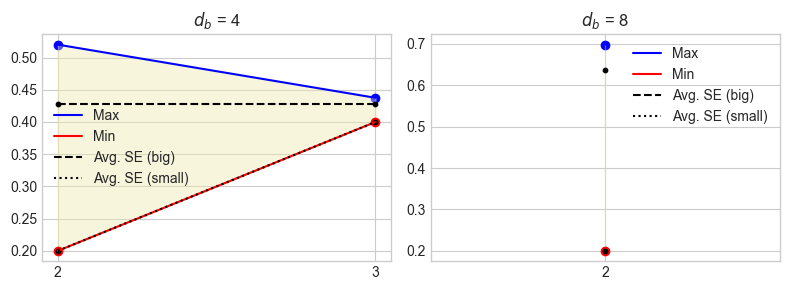

In [97]:
plt.style.use('seaborn-v0_8-whitegrid')

n = len(mins)
cols = math.ceil(math.sqrt(n))
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
axes = axes.flatten()
for i, d_b in enumerate(mins.keys()):
    d_s_range, d_s_mins = zip(*mins[d_b])
    d_s_range, d_s_maxs = zip(*maxs[d_b])
    se_s = [avg_magic_analytic(d_s) for d_s in d_s_range]

    axes[i].plot(d_s_range, d_s_maxs, color="blue", label="Max")
    axes[i].scatter(d_s_range, d_s_maxs, color="blue")

    axes[i].fill_between(d_s_range, d_s_mins, d_s_maxs, alpha=0.4, color="palegoldenrod")

    axes[i].plot(d_s_range, d_s_mins, color="red", label="Min")
    axes[i].scatter(d_s_range, d_s_mins, color="red")

    axes[i].plot(d_s_range, [avg_magic_analytic(d_b, nqubits=True)]*len(d_s_range), label="Avg. SE (big)", linestyle="--", color="black")
    axes[i].scatter(d_s_range, [avg_magic_analytic(d_b, nqubits=True)]*len(d_s_range), color="black", s=10)

    axes[i].plot(d_s_range, se_s, label="Avg. SE (small)", linestyle=":", color="black")
    axes[i].scatter(d_s_range, se_s, color="black", s=10)

    axes[i].set_title("$d_b$ = %d" % d_b)
    axes[i].set_xticks(d_s_range)
    axes[i].grid(True)
    axes[i].legend()

for j in range(n, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()
